In [1]:
# import libraries
import pandas as pd
from sklearn import tree # package to make decision tree/forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# visualizing data
import seaborn as sns
import matplotlib.pyplot as plt


#from sklearn.tree import export_graphviz
import numpy as np
#import graphviz

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

# read in data file
df = pd.read_excel("/Users/avery/OneDrive/Documents/GitHub/Clinical_TLB_2023-2024/lung_cancer_tlb.xlsx")

In [2]:
# SET UP
# keep only control and adenocarcinoma
df['CancerType'] = np.where(df['CancerType'].isna(), 'Control', df['CancerType'])

df_tree = df[(df['CancerType'] == 'Control') | (df['CancerType'] == 'Adenocarcinoma')]

In [3]:
# split into seperate dfs for features and labels
features = df_tree.drop(['CancerType', 'sample_id'], axis=1)
labels = df_tree[['pub_id', 'CancerType']]

Simple Train/Test Split for a Single Decison Tree

In [4]:
# split into training and testing sets (stratified split)
train_set_features, test_set_features, train_set_labels, test_set_labels = train_test_split(features, labels, test_size=0.2, stratify=labels['CancerType'])

# using training to fit tree / forest
rf_classifier = RandomForestClassifier(n_estimators=100, bootstrap=False)
rf_classifier.fit(train_set_features.drop('pub_id', axis=1), train_set_labels.drop('pub_id', axis=1))

# using tree / forest to predict testing set
test_set_predictions = rf_classifier.predict(test_set_features.drop('pub_id', axis=1))
accuracy = accuracy_score(test_set_predictions, test_set_labels['CancerType'])
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.68


Visualizing the Train Set

Text(0.5, 1.0, 'Train Set: Lung Cancer Thermograms')

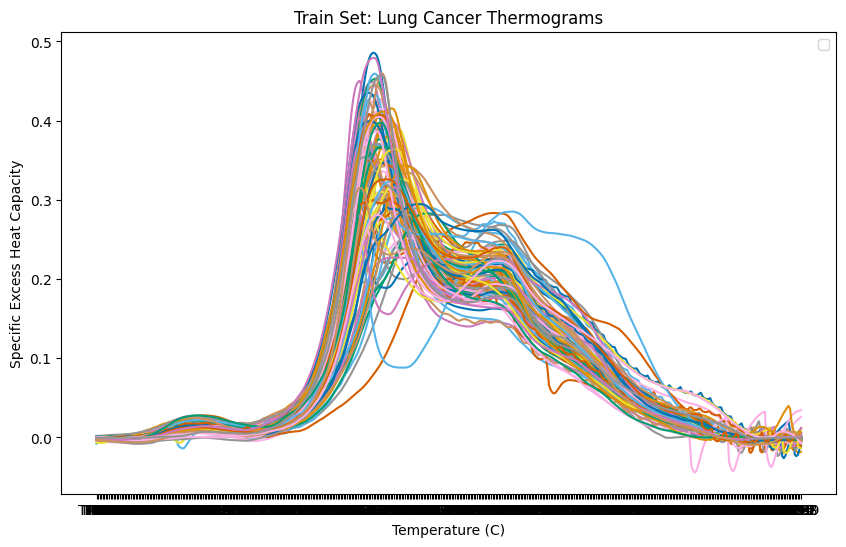

In [5]:
# merge all training data together to get features and labels
all_train = train_set_features.merge(train_set_labels, left_on= 'pub_id', right_on='pub_id')

# pivot longer
all_train_long = df_long = pd.melt(all_train, id_vars=['pub_id', 'CancerType'], var_name='temp', value_name='dsp' )

# visualize
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.lineplot(data=all_train_long, x='temp', y='dsp', hue='pub_id', palette='colorblind')
plt.legend([])
plt.xlabel('Temperature (C)')
plt.ylabel('Specific Excess Heat Capacity')
plt.title('Train Set: Lung Cancer Thermograms')



Visualizing the Test Set

Text(0.5, 1.0, 'Test Set: Lung Cancer Thermograms')

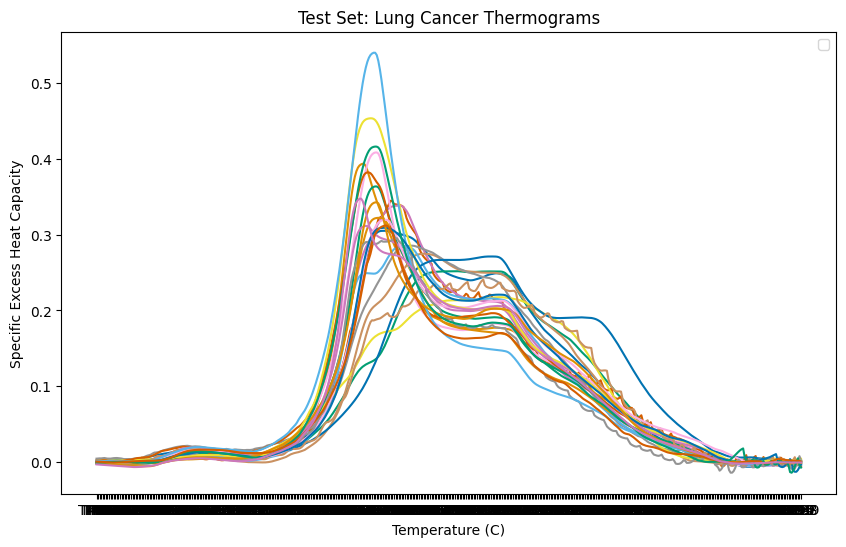

In [6]:
all_test = test_set_features.merge(test_set_labels, left_on= 'pub_id', right_on='pub_id')

# pivot longer
all_test_long = df_long = pd.melt(all_test, id_vars=['pub_id', 'CancerType'], var_name='temp', value_name='dsp' )

# visualize
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.lineplot(data=all_test_long, x='temp', y='dsp', hue='pub_id', palette='colorblind')
plt.legend([])
plt.xlabel('Temperature (C)')
plt.ylabel('Specific Excess Heat Capacity')
plt.title('Test Set: Lung Cancer Thermograms')

Visualize Train and Test on the Same Multipanel Graph

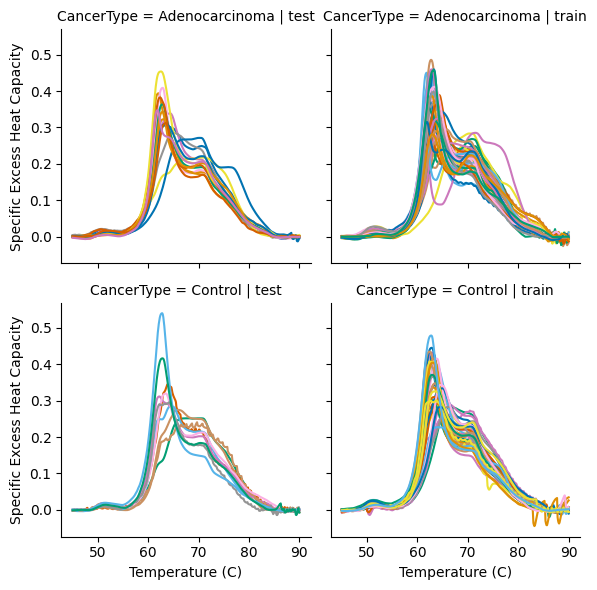

In [7]:
all_test_long['set'] = 'test'
all_train_long['set'] = 'train'
all_sets = pd.concat([all_test_long, all_train_long])

all_sets['temp'] = all_sets['temp'].str.replace('T', '')
all_sets = all_sets.astype({"temp" : float})

g = sns.FacetGrid(all_sets, col="set", row = 'CancerType', hue="pub_id", palette = 'colorblind')
g.map_dataframe(sns.lineplot, x="temp", y="dsp")
g.set_axis_labels("Temperature (C)", "Specific Excess Heat Capacity")
g.set_titles(col_template="{col_name}")